Fuente de los datos: https://www.kaggle.com/datasets/tamber/steam-video-games

In [7]:
import pandas as pd

In [8]:
datos = pd.read_csv("steam-200k.csv", header=None, names=["id", "juego", "comportamiento", "horas", ""])

In [13]:
datos

,id,juego,comportamiento,horas,
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0.0
1,151603712,Fallout 4,play,87.0,0.0
2,151603712,Spore,play,14.9,0.0
3,151603712,Fallout New Vegas,play,12.1,0.0
4,151603712,Left 4 Dead 2,play,8.9,0.0
...,...,...,...,...,...
70494,12345,PAYDAY 2,play,7.7,NaN
70495,12345,Call of Duty Modern Warfare 2,play,8.7,NaN
70496,12345,Call of Duty Modern Warfare 2 - Multiplayer,play,48.8,NaN
70497,12345,Team Fortress 2,play,5.0,NaN


In [10]:
#Eliminamos las compras ya que solo nos interesan las horas de juego
datos = datos[datos["comportamiento"]=="play"]

In [5]:
#Tenemos 3600 juegos diferentes en la BBDD, tenemos que disminuir ese numero para facilitar los calculos
len(datos["juego"].unique())

3600

In [90]:
#Top 25 juegos mas jugados
top_juegos = datos['juego'].value_counts().head(25)
top_juegos

juego
Dota 2                                         4841
Team Fortress 2                                2323
Counter-Strike Global Offensive                1377
Unturned                                       1069
Left 4 Dead 2                                   801
Counter-Strike Source                           715
The Elder Scrolls V Skyrim                      677
Garry's Mod                                     666
Counter-Strike                                  568
Sid Meier's Civilization V                      554
Terraria                                        460
Portal 2                                        453
Warframe                                        424
Portal                                          417
Robocraft                                       407
PAYDAY 2                                        390
Borderlands 2                                   386
Half-Life 2                                     356
Heroes & Generals                               335
War Th

In [12]:
#Añado mi historial de steam
listado = [("Dota 2",54.7),("Sid Meier's Civilization V",131.5),("Counter-Strike Global Offensive",210.3),("Unturned",90.8),
          ("Terraria",58.5),("PAYDAY 2",7.7),("Call of Duty Modern Warfare 2",8.7),("Call of Duty Modern Warfare 2 - Multiplayer",48.8),
          ("Team Fortress 2",5),("Counter-Strike Source",10)]

for juego in listado:
    linea= {"id":12345,"juego":juego[0],"comportamiento":"play","horas":juego[1]}
    datos = pd.concat([datos,pd.DataFrame([linea])], ignore_index=True)


In [14]:
#dataframe filtrado, quitamos los juegos poco jugados
df = datos.groupby("juego").filter(lambda x: len(x)>200)
#bajamos de 200 mil observaciones a 22 mil
len(df)

22240

In [15]:
#Hacemos una tabla agrupada donde cada columna es un juego y cada observacion un usuario
#Ponemos media de horas porque la "puntuacion" de un juego es el numero de horas medias jugadas por usuario
datos_fin = df.pivot_table(index="id", columns="juego", values="horas", aggfunc='mean')
datos_fin

juego,Alien Swarm,BioShock Infinite,Borderlands 2,Call of Duty Black Ops,Call of Duty Modern Warfare 2,Call of Duty Modern Warfare 2 - Multiplayer,Call of Duty Modern Warfare 3,Counter-Strike,Counter-Strike Condition Zero,Counter-Strike Global Offensive,...,Sid Meier's Civilization V,Team Fortress 2,Terraria,The Elder Scrolls V Skyrim,Tomb Raider,Torchlight II,Trove,Unturned,War Thunder,Warframe
id,,,,,,,,,,,,,,,,,,,,,
5250,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12345,NaN,NaN,NaN,NaN,8.7,48.8,NaN,NaN,NaN,210.3,...,131.5,5.0,58.5,NaN,NaN,NaN,NaN,90.8,NaN,NaN
76767,0.8,NaN,NaN,22.0,65.0,165.0,15.9,365.0,NaN,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540,NaN,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,113.0,NaN,3.6,NaN,NaN,NaN,NaN
144736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309262440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309404240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.2,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN
309434439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


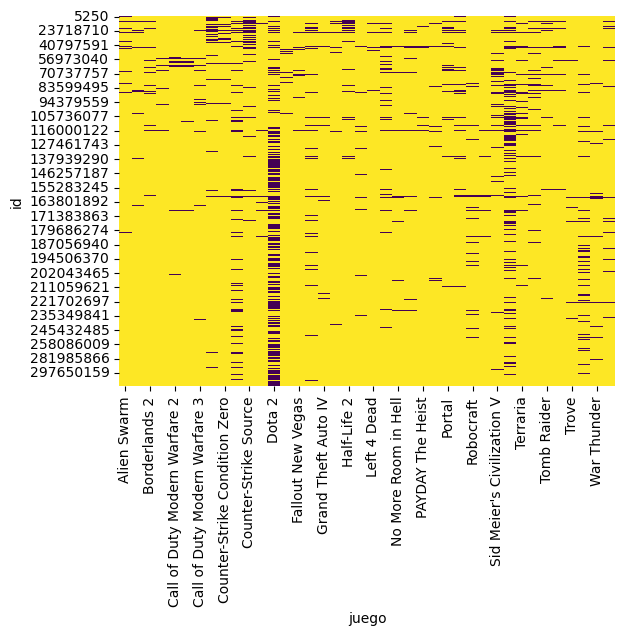

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#Vemos con puntos negros donde si hay datos de juego

sns.heatmap(datos_fin.isnull(), cbar=False, cmap='viridis')
plt.show()


In [22]:
def recomendaciones(id_usuario,bbdd):
    recomendaciones= []
    #Sacamos la lista de juegos que no ha jugado el usuario elegido
    juegos = [c for c in bbdd.columns if pd.isna(bbdd.loc[id_usuario][c])]
    #Miramos cuanto se parecen los gustos de nuestro usuario con el resto
    corr_usuario=bbdd.T.corr().loc[id_usuario]
    
    for j in juegos:
        #Hacemos una matriz que tiene la correlacion del usuario con el resto en una columna y las horas jugadas a ese juego
        matriz= pd.concat([corr_usuario,bbdd[j]],axis=1)
        #Borramos nulos
        matriz.dropna(inplace=True)
        #Multiplicamos las horas jugadas por la correlacion y creamos una columna nueva
        matriz["puntuacion"] = matriz[id_usuario]*matriz[j]
        #Sumamos todas las correlaciones
        suma_usuario=sum(matriz[id_usuario])
        #Sumamos todas las puntuaciones conseguidas
        suma_punt=matriz["puntuacion"].sum()
        if suma_usuario==0:
            score=0
        else:
            #La score final sera la división entre estas
            score=suma_punt/suma_usuario
        recomendaciones.append((j,score))
    #Creamos las 5 recomendaciones finales en orden de mayor score a menor
    return [y[0] for y in sorted(recomendaciones, key=lambda x: x[1],reverse=True)][:5]

In [23]:
#Miraremos mis recomendaciones: me recomiendan 3 juegos de mi lista de deseados y otro que he jugado en otra plataforma y he hechado mas de 50 horas
Alvaro = 12345
recomendaciones(Alvaro,datos_fin)

['Counter-Strike', 'Empire Total War', 'DayZ', 'Rust', 'Grand Theft Auto V']

In [24]:
#A este jugador se le recomiendan juegos de estrategia por turnos y juegos de disparos clásicos
recomendaciones(76767,datos_fin)

["Sid Meier's Civilization V",
 'Dota 2',
 'Empire Total War',
 'Left 4 Dead',
 'Half-Life 2']

In [121]:
#A este jugador se le recomiendan juegos de estrategia
recomendaciones(309404240,datos_fin)

['Dota 2',
 'Counter-Strike Global Offensive',
 "Garry's Mod",
 'Counter-Strike',
 "Sid Meier's Civilization V"]

In [122]:
#A este usuario se le recomiendan juegos de disparos
recomendaciones(5250,datos_fin)

['DayZ',
 'Counter-Strike Global Offensive',
 'Call of Duty Modern Warfare 2 - Multiplayer',
 'Counter-Strike Source',
 'Counter-Strike']

In [123]:
#Juegos de aventuras con disparos
recomendaciones(309903146,datos_fin)

['Alien Swarm',
 'BioShock Infinite',
 'Borderlands 2',
 'Call of Duty Black Ops',
 'Call of Duty Modern Warfare 2']